In [1]:
import tensorflow as tf
from tensorflow import keras 

In [2]:
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_valid, y_valid) = imdb.load_data(num_words=5000, skip_top=50) 

17465344/17464789 [==============================] - 1s 0us/step


In [16]:
X_train[1]

[2,
 194,
 1153,
 194,
 2,
 78,
 228,
 2,
 2,
 1463,
 4369,
 2,
 134,
 2,
 2,
 715,
 2,
 118,
 1634,
 2,
 394,
 2,
 2,
 119,
 954,
 189,
 102,
 2,
 207,
 110,
 3103,
 2,
 2,
 69,
 188,
 2,
 2,
 2,
 2,
 2,
 249,
 126,
 93,
 2,
 114,
 2,
 2300,
 1523,
 2,
 647,
 2,
 116,
 2,
 2,
 2,
 2,
 229,
 2,
 340,
 1322,
 2,
 118,
 2,
 2,
 130,
 4901,
 2,
 2,
 1002,
 2,
 89,
 2,
 952,
 2,
 2,
 2,
 455,
 2,
 2,
 2,
 2,
 1543,
 1905,
 398,
 2,
 1649,
 2,
 2,
 2,
 163,
 2,
 3215,
 2,
 2,
 1153,
 2,
 194,
 775,
 2,
 2,
 2,
 349,
 2637,
 148,
 605,
 2,
 2,
 2,
 123,
 125,
 68,
 2,
 2,
 2,
 349,
 165,
 4362,
 98,
 2,
 2,
 228,
 2,
 2,
 2,
 1157,
 2,
 299,
 120,
 2,
 120,
 174,
 2,
 220,
 175,
 136,
 50,
 2,
 4373,
 228,
 2,
 2,
 2,
 656,
 245,
 2350,
 2,
 2,
 2,
 131,
 152,
 491,
 2,
 2,
 2,
 2,
 1212,
 2,
 2,
 2,
 371,
 78,
 2,
 625,
 64,
 1382,
 2,
 2,
 168,
 145,
 2,
 2,
 1690,
 2,
 2,
 2,
 1355,
 2,
 2,
 2,
 52,
 154,
 462,
 2,
 89,
 78,
 285,
 2,
 145,
 95]

In [4]:
word_index = imdb.get_word_index()
word_index = {k:v+3 for k,v in word_index.items()}
word_index['PAD'] = 0
word_index['Start'] = 1
word_index['UNK'] = 2
word_index['Start']

index_word = {v:k for k,v in word_index.items()}

1646592/1641221 [==============================] - 1s 0us/step


In [0]:
' '.join(index_word[i] for i in X_train[1])

"UNK big hair big UNK bad music UNK UNK giant safety UNK these UNK UNK words UNK best describe UNK terrible UNK UNK love cheesy horror movies UNK i've seen hundreds UNK UNK had got UNK UNK UNK UNK UNK worst ever made UNK plot UNK paper thin UNK ridiculous UNK acting UNK UNK UNK UNK script UNK completely laughable UNK best UNK UNK end showdown UNK UNK cop UNK how UNK worked UNK UNK UNK killer UNK UNK UNK UNK damn terribly written UNK clothes UNK UNK UNK funny UNK equal UNK UNK hair UNK big lots UNK UNK UNK men wear those cut UNK UNK UNK show off their UNK UNK UNK men actually wore them UNK UNK music UNK UNK UNK trash UNK plays over UNK over again UNK almost every scene there UNK trashy music UNK UNK UNK taking away bodies UNK UNK UNK still doesn't close UNK UNK UNK UNK aside UNK UNK UNK truly bad UNK whose only charm UNK UNK look back UNK UNK disaster UNK UNK UNK 80's UNK UNK UNK good old laugh UNK how bad everything UNK back then"

In [0]:
all_train, all_valid = imdb.load_data()
all_train

(array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
        list([1, 194,

In [0]:
' '.join(index_word[i] for i in all_train[0][1])

"Start big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal measures the hair is big lots of boobs bounce men wear those cut tee shirts that show off their stomachs sickening that men actually wore them and the music is just synthesiser trash that plays over and over again in almost every scene there is trashy music boobs and paramedics taking away bodies and the gym still doesn't close for bereavement all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [0]:
' '.join(index_word[i] for i in X_train[1])

"UNK big hair big UNK bad music UNK UNK giant safety UNK these UNK UNK words UNK best describe UNK terrible UNK UNK love cheesy horror movies UNK i've seen hundreds UNK UNK had got UNK UNK UNK UNK UNK worst ever made UNK plot UNK paper thin UNK ridiculous UNK acting UNK UNK UNK UNK script UNK completely laughable UNK best UNK UNK end showdown UNK UNK cop UNK how UNK worked UNK UNK UNK killer UNK UNK UNK UNK damn terribly written UNK clothes UNK UNK UNK funny UNK equal UNK UNK hair UNK big lots UNK UNK UNK men wear those cut UNK UNK UNK show off their UNK UNK UNK men actually wore them UNK UNK music UNK UNK UNK trash UNK plays over UNK over again UNK almost every scene there UNK trashy music UNK UNK UNK taking away bodies UNK UNK UNK still doesn't close UNK UNK UNK UNK aside UNK UNK UNK truly bad UNK whose only charm UNK UNK look back UNK UNK disaster UNK UNK UNK 80's UNK UNK UNK good old laugh UNK how bad everything UNK back then"

In [0]:
from keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train, maxlen=400)

In [0]:
X_valid = pad_sequences(X_valid, maxlen=400)

In [26]:
len(X_train[1])

400

In [0]:
model = keras.Sequential([
                          keras.layers.Embedding(5000, 64, input_length=100),
                          keras.layers.Flatten(),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.fit(X_train, y_train, epochs=4,batch_size=128, validation_data=(X_valid, y_valid))

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 4s 179us/sample - loss: 0.5365 - acc: 0.7109 - val_loss: 0.3521 - val_acc: 0.8462
Epoch 2/4
25000/25000 [==============================] - 4s 174us/sample - loss: 0.2640 - acc: 0.8967 - val_loss: 0.3527 - val_acc: 0.8438
Epoch 3/4
25000/25000 [==============================] - 4s 171us/sample - loss: 0.0970 - acc: 0.9731 - val_loss: 0.4454 - val_acc: 0.8307
Epoch 4/4
25000/25000 [==============================] - 4s 167us/sample - loss: 0.0219 - acc: 0.9974 - val_loss: 0.5400 - val_acc: 0.8321


In [0]:
y_hat = model.predict_proba(X_valid)

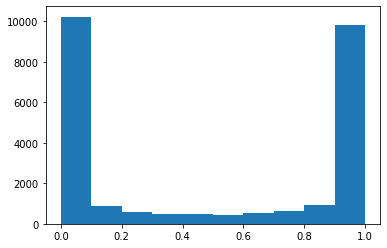

In [0]:
import matplotlib.pyplot as plt
plt.hist(y_hat);

In [0]:
y_float = []
for i in y_hat:
  y_float.append(i[0])

In [0]:
import pandas as pd
df = pd.DataFrame(list(zip(y_float, y_valid)), columns = ['y_hat', 'y'])

In [0]:
df[:10]

,y_hat,y
0,0.044160,0
1,0.999443,1
2,0.996632,1
3,0.032796,0
4,0.999697,1
5,0.970078,1
6,0.935797,1
7,0.000007,0
8,0.975446,0
9,0.994153,1


In [0]:
model = keras.Sequential([
                      keras.layers.Embedding(5000, 64, input_length=100),
                      keras.layers.SpatialDropout1D(0.2),
                      keras.layers.Conv1D(256, 3, activation='relu'),
                      keras.layers.GlobalMaxPooling1D(),
                      keras.layers.Dense(64, activation='relu'),
                      keras.layers.Dropout(0.2),
                      keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=4,batch_size=128, validation_data=(X_valid, y_valid))

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 26s 1ms/sample - loss: 0.1348 - acc: 0.9540 - val_loss: 0.4427 - val_acc: 0.8331
Epoch 2/4
25000/25000 [==============================] - 26s 1ms/sample - loss: 0.0874 - acc: 0.9722 - val_loss: 0.5189 - val_acc: 0.8275
Epoch 3/4
25000/25000 [==============================] - 26s 1ms/sample - loss: 0.0534 - acc: 0.9837 - val_loss: 0.5968 - val_acc: 0.8295
Epoch 4/4
25000/25000 [==============================] - 26s 1ms/sample - loss: 0.0376 - acc: 0.9886 - val_loss: 0.6490 - val_acc: 0.8274


In [0]:
x = [word_index[i] for i in 'this movie is bad'.split()] 
y = [word_index[i]  for i in 'the movie is terrible and i do not recommend it watching it'.split()] 
X = [x,y]


In [0]:
import numpy as np 
X = pad_sequences(np.array(X), maxlen=400)

In [31]:
model.predict(X)

array([[0.29738444],
       [0.01679195]], dtype=float32)

In [1]:
from tensorflow import keras 


In [0]:
keras.Sequential?

In [7]:
input_layer = keras.layers.Input(shape=(400,),dtype= 'int16', name='input_layer')
embed_layer = keras.layers.Embedding(5000, 64, name='embeding_layer')(input_layer)
embed_dropout = keras.layers.SpatialDropout1D(0.2)(embed_layer)
conv_1 = keras.layers.Conv1D(256, 3, activation='relu', name='conv_1')(embed_dropout)
max1 = keras.layers.GlobalMaxPooling1D()(conv_1)

conv_2 = keras.layers.Conv1D(256, 3, activation='relu', name='conv_2')(embed_dropout)
max2 = keras.layers.GlobalMaxPooling1D()(conv_2)

conv_3 = keras.layers.Conv1D(256, 3, activation='relu', name='conv_3')(embed_dropout)
max3 = keras.layers.GlobalMaxPooling1D()(conv_3)
concat = keras.layers.concatenate([max1, max2, max3])
dense_1 = keras.layers.Dense(256, activation='relu', name='dense1')(concat)
dense1_dropout = keras.layers.Dropout(0.2)(dense_1)

dense_2 = keras.layers.Dense(256, activation='relu', name='dense2')(dense1_dropout)
dense2_dropout = keras.layers.Dropout(0.2)(dense_2)

predictions = keras.layers.Dense(1, activation='sigmoid', name='last_layer')(dense2_dropout)
model = keras.models.Model(input_layer, predictions)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
model.fit(X_train, y_train, epochs=4,batch_size=128, validation_data=(X_valid, y_valid))

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 12s 486us/sample - loss: 0.4795 - acc: 0.7457 - val_loss: 0.3117 - val_acc: 0.8662
Epoch 2/4
25000/25000 [==============================] - 6s 224us/sample - loss: 0.2662 - acc: 0.8929 - val_loss: 0.2873 - val_acc: 0.8796
Epoch 3/4
25000/25000 [==============================] - 6s 222us/sample - loss: 0.1822 - acc: 0.9301 - val_loss: 0.3033 - val_acc: 0.8808
Epoch 4/4
25000/25000 [==============================] - 6s 221us/sample - loss: 0.1219 - acc: 0.9562 - val_loss: 0.3326 - val_acc: 0.8763
